<a href="https://colab.research.google.com/github/Sanjay1531/Skills4future/blob/main/human_wellbeing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 1. Generate Simulated Dataset
np.random.seed(42)
n_samples = 1000  # Increased dataset size

# Features: Sleep (hrs), Exercise (mins/day), Diet (score 1-10), Stress (1-10)
sleep = np.random.normal(7, 1.5, n_samples)
exercise = np.random.randint(0, 120, n_samples)
diet = np.random.randint(1, 11, n_samples)
stress = np.random.randint(1, 11, n_samples)

# Target Variable: Wellbeing (1 = Good, 0 = Poor)
wellbeing = ((sleep > 6) & (exercise > 30) & (diet > 5) & (stress < 5)).astype(int)
# 1. Generate Simulated Dataset
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 1000  # Increased dataset size

# Features: Sleep (hrs), Exercise (mins/day), Diet (score 1-10), Stress (1-10)
sleep = np.random.normal(7, 1.5, n_samples)
exercise = np.random.randint(0, 120, n_samples)
diet = np.random.randint(1, 11, n_samples)
stress = np.random.randint(1, 11, n_samples)

# Target Variable: Wellbeing (1 = Good, 0 = Poor)
wellbeing = ((sleep > 6) & (exercise > 30) & (diet > 5) & (stress < 5)).astype(int)

# Create DataFrame
df = pd.DataFrame({'Sleep': sleep, 'Exercise': exercise, 'Diet': diet, 'Stress': stress, 'Wellbeing': wellbeing})

In [ ]:
# 3. Data Preprocessing
X = df[['Sleep', 'Exercise', 'Diet', 'Stress']]
y = df['Wellbeing']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 4. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       178
           1       0.85      0.50      0.63        22

    accuracy                           0.94       200
   macro avg       0.89      0.74      0.80       200
weighted avg       0.93      0.94      0.93       200



In [ ]:
# 5. Application-Specific Predictions
def predict_wellbeing(sleep, exercise, diet, stress):
    """Predicts wellbeing based on input features."""
    input_data = np.array([[sleep, exercise, diet, stress]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]

    print("\n--- Wellbeing Prediction ---")
    if prediction == 1:
        print("✅ Personalized Health: Your wellbeing is good! Keep up your routine.")
        print("✅ Workplace Wellbeing: Employee is in a healthy state.")
        print("✅ Healthcare Insights: No immediate concerns, maintain lifestyle.")
        print("✅ Smartwatch: Great job! Stay consistent.")
    else:
        print("⚠️ Personalized Health: Consider improving sleep, diet, or reducing stress.")
        print("⚠️ Workplace Wellbeing: Wellness programs recommended.")
        print("⚠️ Healthcare Insights: Check with a doctor if feeling unwell.")
        print("⚠️ Smartwatch: Alert! Try to rest more and exercise.")


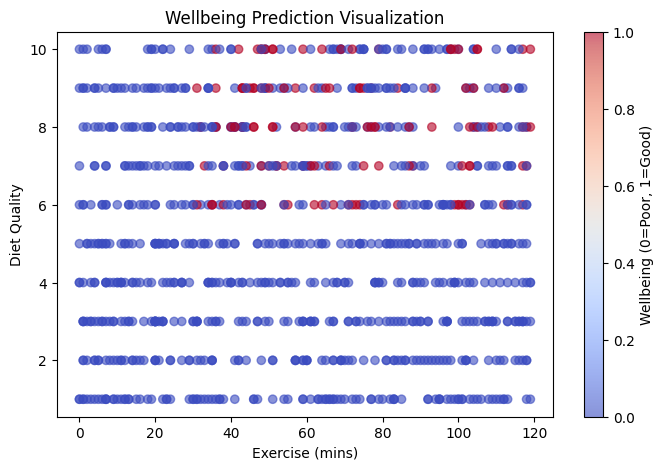


--- Wellbeing Prediction ---
⚠️ Personalized Health: Consider improving sleep, diet, or reducing stress.
⚠️ Workplace Wellbeing: Wellness programs recommended.
⚠️ Healthcare Insights: Check with a doctor if feeling unwell.
⚠️ Smartwatch: Alert! Try to rest more and exercise.

--- Wellbeing Prediction ---
✅ Personalized Health: Your wellbeing is good! Keep up your routine.
✅ Workplace Wellbeing: Employee is in a healthy state.
✅ Healthcare Insights: No immediate concerns, maintain lifestyle.
✅ Smartwatch: Great job! Stay consistent.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 6. Visualization
plt.figure(figsize=(8,5))
plt.scatter(df['Exercise'], df['Diet'], c=df['Wellbeing'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Exercise (mins)")
plt.ylabel("Diet Quality")
plt.title("Wellbeing Prediction Visualization")
plt.colorbar(label="Wellbeing (0=Poor, 1=Good)")
plt.show()



# Example Prediction
predict_wellbeing(5.5, 20, 4, 7)  # Poor Wellbeing Example
predict_wellbeing(8, 60, 9, 2)  # Good Wellbeing Example